# `anns-1`: Deep learning for vision
In this lab, we'll explore some common architectures for deep neural networks. You'll need to install [PyTorch](https://pytorch.org/) in your conda environment: `conda install pytorch torchvision -c pytorch`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

/Users/snastase/miniconda3/envs/neu502b/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/snastase/miniconda3/envs/neu502b/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /Users/snastase/miniconda3/envs/neu502b/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/opt/X11/lib/flat_namespace/libjpeg.9.dylib' (no such file), '/Users/snastase/miniconda3/envs/neu502b/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/snastase/miniconda3/envs/neu502b/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/snastase/miniconda3/envs/neu502b/lib/python3.12/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/snastase/miniconda3/envs/neu502b/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image f

In [2]:
# Get device for training (e.g. MacOS 'mps')
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


### Multilayer perceptron
In the following exercise, we'll (de)construct a fully-connected feedforward network (i.e. multilayer perceptron; MLP). We'll use the rectified linear unit (ReLU) nonlinearity at hidden and output layers. This network will take as input pixels from MNIST images of handwritten digits and learn to output the correct digit label $0$ to $9$.

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
# Create a random image and confirm shape
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [6]:
# Flatten image and inspect shape
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [7]:
# Pass flattened input image through first layer
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [8]:
# Introduce nonlinearity ReLU
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1494, -0.0192, -0.0778, -0.0360,  0.2544,  0.0497,  0.1793,  0.5193,
          0.2267,  0.0706,  0.0390,  0.3626,  0.2386, -0.2266, -0.0674, -0.1057,
         -0.0605,  0.1466, -0.1666,  0.2050],
        [ 0.2361,  0.0026, -0.1876,  0.1045,  0.3015,  0.2611,  0.2626,  0.5896,
          0.0936, -0.0553, -0.2797,  0.5407,  0.0157, -0.0383, -0.0080, -0.2019,
         -0.2719,  0.1114,  0.0576,  0.1122],
        [ 0.0529, -0.2187, -0.2689, -0.2597,  0.3775,  0.0130,  0.1517,  0.7412,
          0.0394, -0.1736,  0.0705,  0.5213, -0.0695, -0.2812,  0.1812, -0.1023,
          0.0484, -0.2455, -0.3618, -0.0042]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1494, 0.0000, 0.0000, 0.0000, 0.2544, 0.0497, 0.1793, 0.5193, 0.2267,
         0.0706, 0.0390, 0.3626, 0.2386, 0.0000, 0.0000, 0.0000, 0.0000, 0.1466,
         0.0000, 0.2050],
        [0.2361, 0.0026, 0.0000, 0.1045, 0.3015, 0.2611, 0.2626, 0.5896, 0.0936,
         0.0000, 0.0000, 0.5407, 0.0157, 0.0000, 0.00

In [9]:
# Chain these operations into sequence
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [10]:
# Softmax predictions into probability distribution
softmax = nn.Softmax(dim = 1)
pred_probab = softmax(logits)
print(f"Logits: {logits}\nMin: {logits.min():.6f}\nMax: {logits.max():.6f}")
print(f"Softmaxed: {pred_probab}\nMin: {pred_probab.min():.6f}\n"
      f"Max: {pred_probab.max():.6f}\n{pred_probab.sum(axis=1)}")

Logits: tensor([[-0.1552,  0.2437, -0.2456,  0.3958, -0.2293, -0.1989, -0.1963,  0.0040,
          0.0034, -0.6217],
        [-0.0984,  0.1159, -0.1967,  0.3043, -0.0892, -0.2845, -0.1889, -0.0206,
         -0.0906, -0.4959],
        [-0.2448,  0.1873, -0.1283,  0.2827, -0.1056, -0.2625, -0.1561, -0.1130,
         -0.1084, -0.4289]], grad_fn=<AddmmBackward0>)
Min: -0.621714
Max: 0.395797
Softmaxed: tensor([[0.0913, 0.1360, 0.0834, 0.1584, 0.0848, 0.0874, 0.0876, 0.1070, 0.1070,
         0.0572],
        [0.0985, 0.1220, 0.0893, 0.1473, 0.0994, 0.0818, 0.0900, 0.1064, 0.0992,
         0.0662],
        [0.0855, 0.1316, 0.0960, 0.1448, 0.0982, 0.0840, 0.0934, 0.0975, 0.0979,
         0.0711]], grad_fn=<SoftmaxBackward0>)
Min: 0.057246
Max: 0.158360
tensor([1., 1., 1.], grad_fn=<SumBackward1>)


In [11]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

In [12]:
batch_size = 64

# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


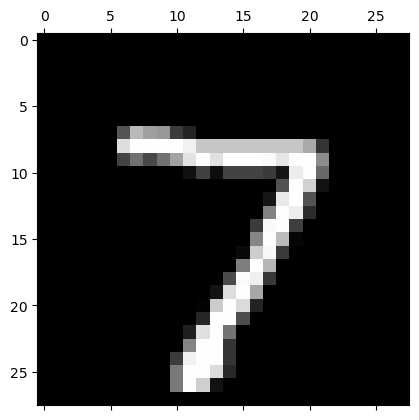

In [13]:
# Visualize an example MNIST digit
mnist_id = 0
plt.matshow(X[mnist_id, 0], cmap='gray');

In [14]:
# Redefine our model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [15]:
# Define a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [16]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    # Train the model
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Clear gradients for this training step
        optimizer.zero_grad()
        
        # Compute gradients via backpropagation
        loss.backward()
        
        # Apply gradients
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [17]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    
    # Test the model
    model.eval()

    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            
            # Compute model predictions on test set
            pred = model(X)
            
            # Compute loss between predicted and actual labels
            test_loss += loss_fn(pred, y).item()
            
            # Number correct for accuracy
            correct += (pred.max(axis=1).indices == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test error: \n Accuracy: {(100*correct):>0.1f}%, mean loss: {test_loss:>8f} \n")

In [18]:
# Fit the model!
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304243  [    0/60000]
loss: 2.294697  [ 6400/60000]
loss: 2.293162  [12800/60000]
loss: 2.296443  [19200/60000]
loss: 2.286513  [25600/60000]
loss: 2.276189  [32000/60000]
loss: 2.266360  [38400/60000]
loss: 2.272683  [44800/60000]
loss: 2.265659  [51200/60000]
loss: 2.262096  [57600/60000]
Test error: 
 Accuracy: 43.3%, mean loss: 2.258112 

Epoch 2
-------------------------------
loss: 2.259550  [    0/60000]
loss: 2.247411  [ 6400/60000]
loss: 2.255322  [12800/60000]
loss: 2.238732  [19200/60000]
loss: 2.240104  [25600/60000]
loss: 2.227487  [32000/60000]
loss: 2.209081  [38400/60000]
loss: 2.231813  [44800/60000]
loss: 2.206499  [51200/60000]
loss: 2.200574  [57600/60000]
Test error: 
 Accuracy: 57.1%, mean loss: 2.196673 

Epoch 3
-------------------------------
loss: 2.196612  [    0/60000]
loss: 2.179090  [ 6400/60000]
loss: 2.199589  [12800/60000]
loss: 2.153221  [19200/60000]
loss: 2.167928  [25600/60000]
loss: 2.150754  [32000/6

Predicted: "6", Actual: "5"


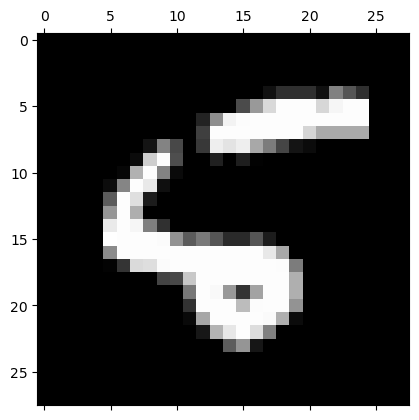

In [19]:
# Visualize model predictions from the test set
classes = np.arange(10)
test_id = 8

x, y = test_data[test_id][0], test_data[test_id][1]
with torch.no_grad():
    plt.matshow(x[0], cmap='gray')
    x, y = x.to(device), y
    pred = model(x)
    predicted, actual = classes[pred.max(axis=1).indices], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

### Convolutional neural network
In this excercise, we'll perform the same digit recognition task using a convolutional neural network (CNN). For brevity, the CNN will comprise two convolutional layers followed by max-pooling layers, culminating in a single fully-connected layer. 

In [20]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=4,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 4, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )

        # Fully connected layer outputs 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)

        # Flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output

model = ConvNet().to(device)
print(model)

ConvNet(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [21]:
# Define same loss and optimizer as above
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [22]:
# Fit the model!
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.310146  [    0/60000]
loss: 2.304029  [ 6400/60000]
loss: 2.289904  [12800/60000]
loss: 2.280433  [19200/60000]
loss: 2.288378  [25600/60000]
loss: 2.284853  [32000/60000]
loss: 2.264970  [38400/60000]
loss: 2.272026  [44800/60000]
loss: 2.255702  [51200/60000]
loss: 2.237698  [57600/60000]
Test error: 
 Accuracy: 47.4%, mean loss: 2.244536 

Epoch 2
-------------------------------
loss: 2.249099  [    0/60000]
loss: 2.233713  [ 6400/60000]
loss: 2.232458  [12800/60000]
loss: 2.181472  [19200/60000]
loss: 2.199187  [25600/60000]
loss: 2.185049  [32000/60000]
loss: 2.127254  [38400/60000]
loss: 2.143290  [44800/60000]
loss: 2.079287  [51200/60000]
loss: 2.013330  [57600/60000]
Test error: 
 Accuracy: 68.5%, mean loss: 2.012791 

Epoch 3
-------------------------------
loss: 2.024097  [    0/60000]
loss: 1.941519  [ 6400/60000]
loss: 1.904058  [12800/60000]
loss: 1.704564  [19200/60000]
loss: 1.637723  [25600/60000]
loss: 1.519232  [32000/6